### **数据分析及可视化**

对训练集的分类标签进行分析及可视化，探索数据的分布

In [ ]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
def load_data(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

# 统计标签分布
def count_labels(data):
    qd_count = {}
    sl_count = {}
    zjppt_count = {f"C{i}-{i+1}": {} for i in range(2, 7)}
    zyzg_count = {f"C{i}": {} for i in range(2, 8)}
    zyzg_count.update({f"C{i}-{i+1}": {} for i in range(2, 7)})
    
    for item in data:
        qd_count[item['qd']] = qd_count.get(item['qd'], 0) + 1
        sl_count[item['sl']] = sl_count.get(item['sl'], 0) + 1
        
        for i, label in enumerate(item['zjppt']):
            zjppt_count[f"C{i+2}-{i+3}"][label] = zjppt_count[f"C{i+2}-{i+3}"].get(label, 0) + 1
        
        for i, label in enumerate(item['zyzg']):
            if i % 2 == 0:  # 椎体
                zyzg_count[f"C{(i // 2) + 2}"][label] = zyzg_count[f"C{(i // 2) + 2}"].get(label, 0) + 1
            else:  # 椎间
                zyzg_count[f"C{(i // 2) + 2}-{(i // 2) + 3}"][label] = zyzg_count[f"C{(i // 2) + 2}-{(i // 2) + 3}"].get(label, 0) + 1
    
    return qd_count, sl_count, zjppt_count, zyzg_count

In [ ]:
train_label_dir = "D:\\比赛\\通用人工智能大赛\\cervai_challenge-main\\cervai_challenge-main\\data\\train.json"  
train_data_label = load_data(train_label_dir) 

print("Training Set Label Distribution:")
qd_count, sl_count, zjppt_count, zyzg_count = count_labels(train_data_label)

In [16]:
qd_count, sl_count, zjppt_count, zyzg_count

({1: 269, 2: 68, 0: 63},
 {1: 378, 0: 22},
 {'C2-3': {0: 279, 2: 120, 1: 1},
  'C3-4': {0: 52, 2: 304, 1: 29, 3: 15},
  'C4-5': {0: 36, 2: 330, 1: 26, 3: 8},
  'C5-6': {0: 40, 2: 327, 3: 7, 1: 26},
  'C6-7': {0: 92, 2: 278, 1: 29, 3: 1}},
 {'C2': {0: 389, 1: 9, 2: 2},
  'C3': {0: 336, 1: 49, 2: 14, 3: 1},
  'C4': {0: 309, 1: 65, 2: 24, 3: 2},
  'C5': {0: 303, 3: 3, 1: 74, 2: 20},
  'C6': {0: 316, 2: 17, 1: 67},
  'C7': {0: 381, 2: 4, 1: 15},
  'C2-3': {0: 275, 1: 109, 2: 16},
  'C3-4': {0: 54, 2: 84, 1: 234, 3: 28},
  'C4-5': {0: 43, 1: 203, 2: 121, 3: 33},
  'C5-6': {0: 43, 2: 152, 1: 163, 3: 42},
  'C6-7': {0: 98, 1: 220, 2: 73, 3: 9}})

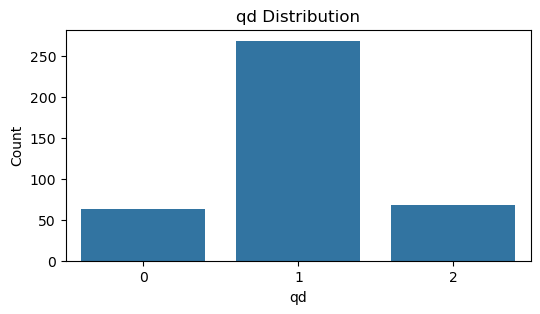

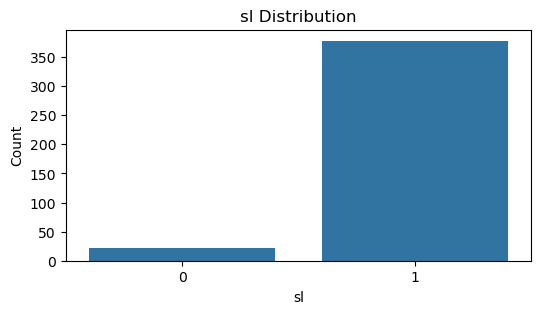

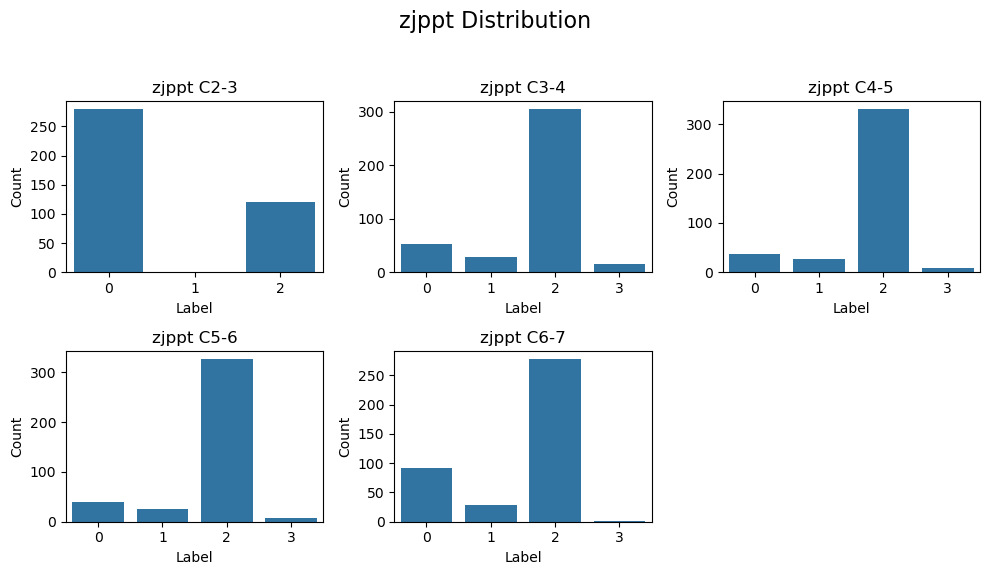

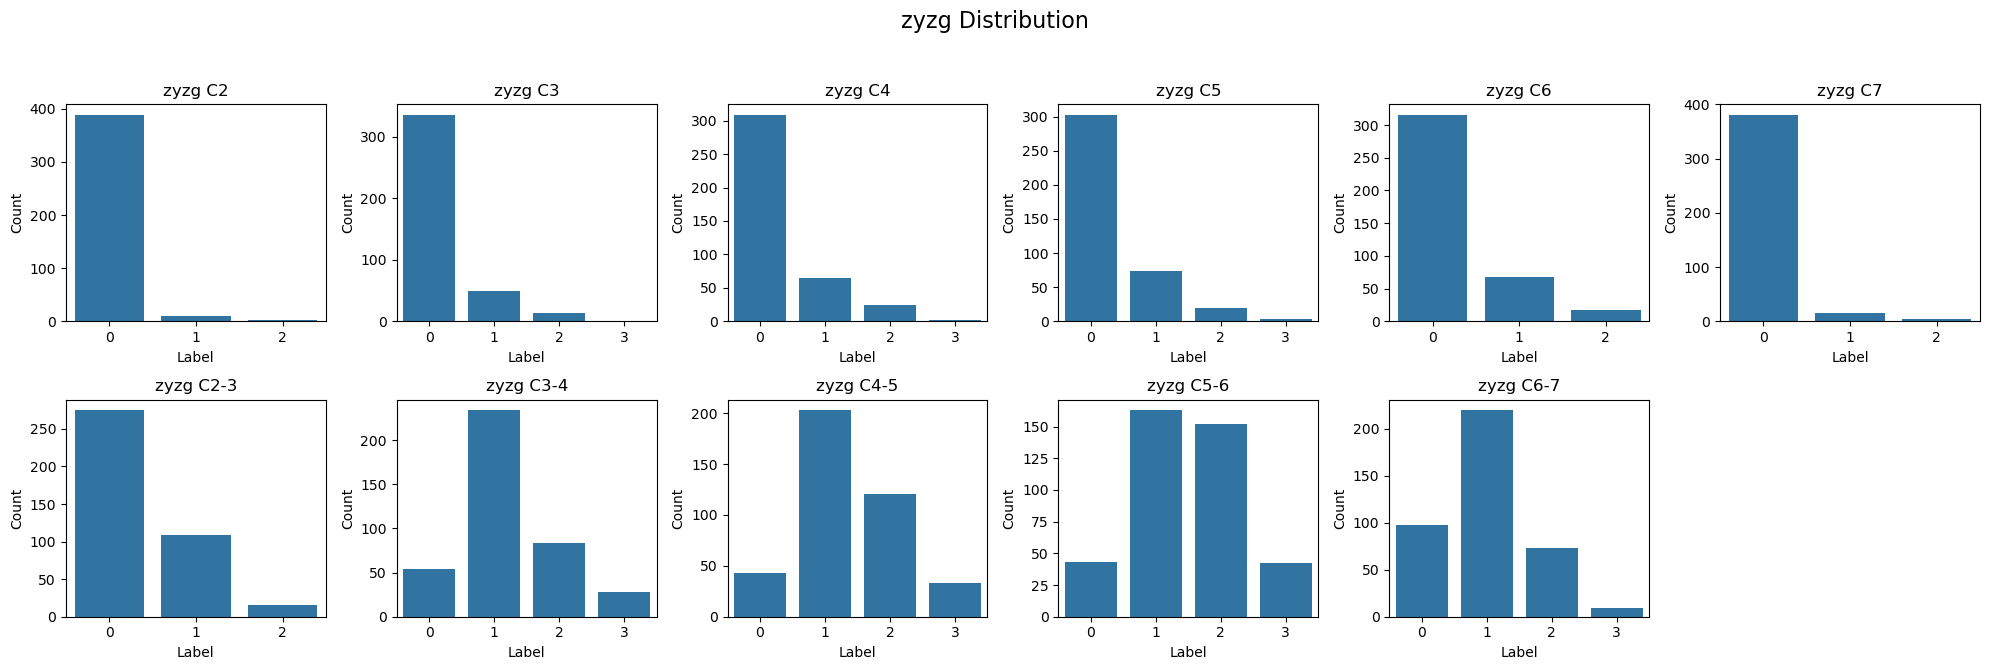

In [15]:
# 结果可视化
    
# qd 分布
plt.figure(figsize=(6, 3))
sns.barplot(x=list(qd_count.keys()), y=list(qd_count.values()))
plt.title('qd Distribution')
plt.xlabel('qd')
plt.ylabel('Count')
plt.show()

# sl 分布
plt.figure(figsize=(6, 3))
sns.barplot(x=list(sl_count.keys()), y=list(sl_count.values()))
plt.title('sl Distribution')
plt.xlabel('sl')
plt.ylabel('Count')
plt.show()

# zjppt 分布
plt.figure(figsize=(10, 6))
for i, (key, value) in enumerate(zjppt_count.items()):
    plt.subplot(2, 3, i + 1)
    sns.barplot(x=list(value.keys()), y=list(value.values()))
    plt.title(f'zjppt {key}')
    plt.xlabel('Label')
    plt.ylabel('Count')
plt.suptitle(f'zjppt Distribution', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# zyzg 分布
plt.figure(figsize=(20, 7))
for i, (key, value) in enumerate(zyzg_count.items()):
    plt.subplot(2, 6, i + 1)
    sns.barplot(x=list(value.keys()), y=list(value.values()))
    plt.title(f'zyzg {key}')
    plt.xlabel('Label')
    plt.ylabel('Count')
plt.suptitle(f'zyzg Distribution', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()